### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID:22215314

---

## Instructions

### 1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

-This part of work is been finished in other file named DM2021-Lab1-master in the same repository

### 2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
1. Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
2. You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

In [1]:
# --- import library --- #
import csv
import helpers.data_mining_helpers as dmh
import numpy as np

# -- load dataset -- #
dataset = []
dataset_data = []
dataset_score = []
dataset_lib = []
dataset_lib_name = []

file_names = ['amazon_cells_labelled.txt',
              'imdb_labelled.txt',
              'yelp_labelled.txt']

for index, file_name in enumerate(file_names):
    
    fileID = open(file_names[index])
    dataset_temp = list(csv.reader(fileID, delimiter = "\t"))
    
    fileID.close()    
    
    dataset.extend(dataset_temp)
    dataset_data.extend([i[0] for i in dataset_temp])
    dataset_score.extend([i[1] for i in dataset_temp])
    dataset_lib.extend([int(index) for i in dataset_temp])
    dataset_lib_name.extend([file_name[:-13] for i in dataset_temp])

In [2]:
# -- check the length of the dataset -- #
len(dataset_lib)

3000

In [3]:
# -- show firt # data -- #
dataset[:9]

[['So there is no way for me to plug it in here in the US unless I go by a converter.',
  '0'],
 ['Good case, Excellent value.', '1'],
 ['Great for the jawbone.', '1'],
 ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  '0'],
 ['The mic is great.', '1'],
 ['I have to jiggle the plug to get it to line up right to get decent volume.',
  '0'],
 ['If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
  '0'],
 ['If you are Razr owner...you must have this!', '1'],
 ['Needless to say, I wasted my money.', '0']]

In [4]:
# -- convert data to pandas -- #
import pandas as pd
DS = pd.DataFrame(dataset, columns=['text', 'score'])
DS['lib_name'] = dataset_lib_name
DS['lib'] = dataset_lib

In [5]:
# -- reordered the data -- #
DS = DS.sample(frac=1).reset_index(drop=True)

In [6]:
DS[0:9]

,text,score,lib_name,lib
0,I would not recommend this item to anyone.,0,amazon_cells,0
1,* Comes with a strong light that you can use t...,1,amazon_cells,0
2,"It was either too cold, not enough flavor or j...",0,yelp,2
3,"The food sucked, which we expected but it suck...",0,yelp,2
4,"John Garfield, Ann revere, Lilli Plmer, Willia...",1,imdb,1
5,But this movie really got to me.,1,imdb,1
6,This particular model would not work with my M...,0,amazon_cells,0
7,(very serious spoilers) this movie was a huge ...,0,imdb,1
8,"I've only had my bluetooth for a few weeks, bu...",1,amazon_cells,0


In [7]:
# -- practicing the query techniqu -- #
DS.iloc[::10, 0:2][0:10]

,text,score
0,I would not recommend this item to anyone.,0
10,The voice recognition thru the handset is exce...,1
20,"No allergy warnings on the menu, and the waitr...",0
30,EXCELLENT SERVICE!!!!!!!!.,1
40,My ribeye steak was cooked perfectly and had g...,1
50,It was horrible!.,0
60,This was like the final blow!,0
70,"Never been to Hard Rock Casino before, WILL NE...",0
80,"It was very popular when I was in the cinema, ...",1
90,Its not user friendly.,0


In [8]:
DS.loc[::10, 'text'][0:10]

0            I would not recommend this item to anyone.
10    The voice recognition thru the handset is exce...
20    No allergy warnings on the menu, and the waitr...
30                           EXCELLENT SERVICE!!!!!!!!.
40    My ribeye steak was cooked perfectly and had g...
50                                    It was horrible!.
60                        This was like the final blow!
70    Never been to Hard Rock Casino before, WILL NE...
80    It was very popular when I was in the cinema, ...
90                               Its not user friendly.
Name: text, dtype: object

In [9]:
# -- null value check -- #
DS.isnull()

,text,score,lib_name,lib
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [10]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [11]:
DS.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [12]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [13]:
dummy_series


text     dummy_record
score               1
dtype: object

In [14]:
result_with_series = DS.append(dummy_series, ignore_index=True)

In [15]:
result_with_series

,text,score,lib_name,lib
0,I would not recommend this item to anyone.,0,amazon_cells,0.0
1,* Comes with a strong light that you can use t...,1,amazon_cells,0.0
2,"It was either too cold, not enough flavor or j...",0,yelp,2.0
3,"The food sucked, which we expected but it suck...",0,yelp,2.0
4,"John Garfield, Ann revere, Lilli Plmer, Willia...",1,imdb,1.0
...,...,...,...,...
2996,Good price.,1,amazon_cells,0.0
2997,It's practically perfect in all of them ? a tr...,1,imdb,1.0
2998,Plan on ordering from them again and again.,1,amazon_cells,0.0
2999,Highly entertaining at all angles.,1,imdb,1.0


In [16]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [17]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [18]:
DS = DS.append(dummy_dict, ignore_index=True)
len(DS)

3001

In [19]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [20]:
DS.dropna(inplace=True)

In [21]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [22]:
len(DS)

3000

In [23]:
# -- check the duplicated value -- #
sum(DS.duplicated('text'))

16

In [24]:
DS.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [25]:
duplicate=DS[DS.duplicated('text')]

In [26]:
duplicate['text']

894                                          Great phone.
1624                                This is a great deal.
1802                                   Not recommended.  
2004                                        Does not fit.
2021                                        Great phone!.
2261                               The food was terrible.
2328                                         Works great.
2455                                   I love this place.
2484                                         Great Phone.
2548                     Excellent product for the price.
2613                              Don't buy this product.
2635                     Definitely worth checking out.  
2715                                        Works great!.
2752    If you like a loud buzzing to override all you...
2777                    I would not recommend this place.
2893                                     I won't be back.
Name: text, dtype: object

In [27]:
DS.drop_duplicates(keep=False, inplace=True)

In [28]:
len(DS)

2968

In [29]:
# -- Data sampling -- #
DS_sample = DS.sample(n=1000)
DS_sample[0:4]

,text,score,lib_name,lib
1841,Stopped by during the late May bank holiday of...,1,yelp,2.0
2805,I am so pleased to know such a modern day geni...,1,imdb,1.0
1435,It's pretty surprising that this wonderful fil...,1,imdb,1.0
2676,The cow tongue and cheek tacos are amazing.,1,yelp,2.0


In [30]:
# -- creating the distribution plot by the lib -- #
import matplotlib.pyplot as plt
%matplotlib inline

imdb            996
yelp            992
amazon_cells    980
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Library distribution'}>

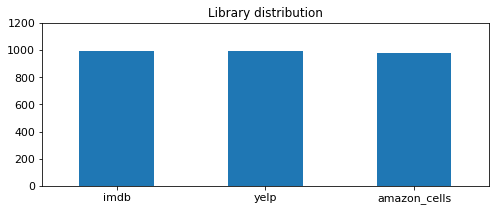

In [31]:
# -- original data plot -- #
print(DS.lib_name.value_counts())
DS.lib_name.value_counts().plot(kind = 'bar',
                                title = 'Library distribution',
                                ylim = [0, 1200],
                                rot = 0, fontsize = 11, figsize = (8,3))

imdb            356
yelp            334
amazon_cells    310
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Sample lib distribution'}>

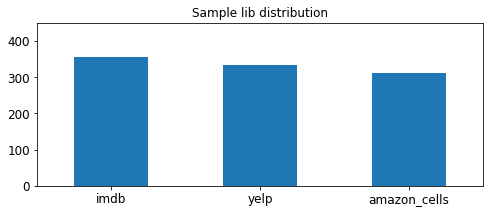

In [32]:
# -- sampled data plot -- #
print(DS_sample.lib_name.value_counts())

# plot barchart for DS_sample
DS_sample.lib_name.value_counts().plot(kind = 'bar',
                                       title = 'Sample lib distribution',
                                       ylim = [0, 450],
                                       rot = 0, fontsize = 12, figsize = (8,3))

In [33]:
X = DS_sample.lib_name.value_counts().index

In [34]:
X_axis = np.arange(len(X))

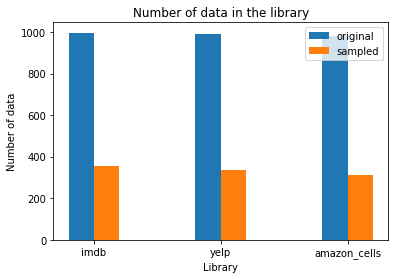

In [35]:
plt.bar(X_axis - 0.1, DS.lib_name.value_counts(), 0.2, label='original')
plt.bar(X_axis + 0.1, DS_sample.lib_name.value_counts(), 0.2, label='sampled')

plt.xticks(X_axis, X)
plt.xlabel("Library")
plt.ylabel("Number of data")
plt.title("Number of data in the library")
plt.legend()
plt.show()

In [36]:
# -- creating freature with nltk -- #
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/neaf-2070/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
DS['unigrams'] = DS['text'].apply(lambda x: dmh.tokenize_text(x))

In [38]:
DS[0:4]["unigrams"]

0    [I, would, not, recommend, this, item, to, any...
1    [*, Comes, with, a, strong, light, that, you, ...
2    [It, was, either, too, cold, ,, not, enough, f...
3    [The, food, sucked, ,, which, we, expected, bu...
Name: unigrams, dtype: object

In [39]:
DS[0:4]

,text,score,lib_name,lib,unigrams
0,I would not recommend this item to anyone.,0,amazon_cells,0.0,"[I, would, not, recommend, this, item, to, any..."
1,* Comes with a strong light that you can use t...,1,amazon_cells,0.0,"[*, Comes, with, a, strong, light, that, you, ..."
2,"It was either too cold, not enough flavor or j...",0,yelp,2.0,"[It, was, either, too, cold, ,, not, enough, f..."
3,"The food sucked, which we expected but it suck...",0,yelp,2.0,"[The, food, sucked, ,, which, we, expected, bu..."


In [40]:
list(DS[0:1]['unigrams'])

[['I', 'would', 'not', 'recommend', 'this', 'item', 'to', 'anyone', '.']]

In [41]:
# -- counting words frequency -- #
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
DS_counts = count_vect.fit_transform(DS.text)

In [42]:
analyze = count_vect.build_analyzer()

In [43]:
DS_counts.shape

(2968, 5154)

In [44]:
# -- showing result of the partial DS_counts -- #
DS_counts[0:20,0:100].toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
# -- count for the specific number of document -- #
numDoc = 20
total_voc_count = sum(DS_counts[0:20]).toarray()

In [46]:
total_voc_count.shape

(1, 5154)

In [47]:
# -- calculate the most counted 50 words -- #
first_num_voc = total_voc_count[0].argsort()[-50:][::-1]

In [48]:
first_num_voc.shape

(50,)

In [49]:
list_num_voc = [count_vect.get_feature_names()[i] for i in first_num_voc[:] ]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
plot_x = ["term_" + str(i) for i in list_num_voc]
plot_y = ["doc_" + str(i) for i in list(DS.index)[0:20]]
plot_z = DS_counts[0:20, first_num_voc[:]].toarray()

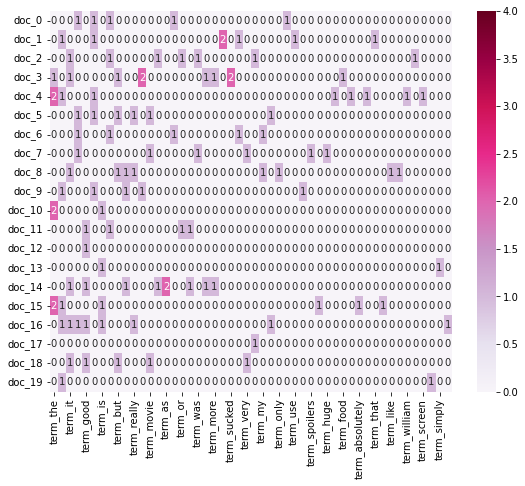

In [51]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=4, annot=True)

In [52]:
# -- reduced dimension with PCA -- #
from sklearn.decomposition import PCA

In [53]:
DS_reduced = PCA(n_components=2).fit_transform(DS_counts.toarray())

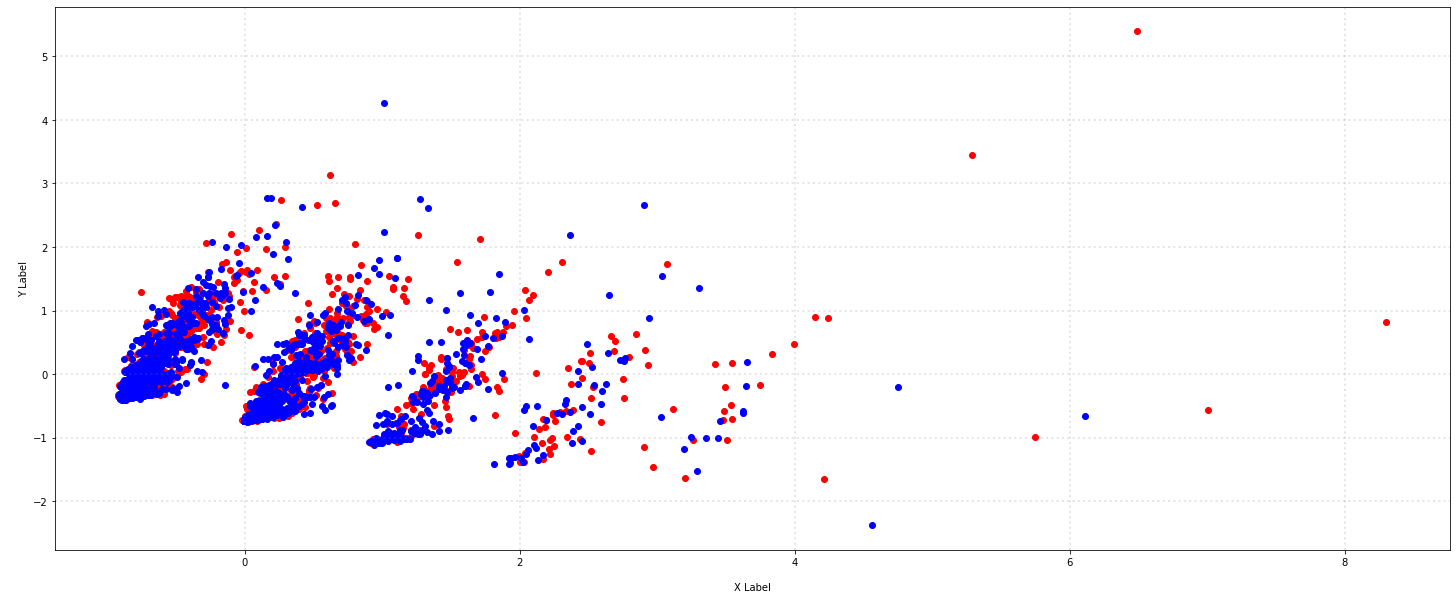

In [54]:
# -- plot the result of PCV -- #
col = ['r', 'b']

categories = ['1', '0']
fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = DS_reduced[DS['score'] == category].T[0]
    ys = DS_reduced[DS['score'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [55]:
# -- calculate the frequencies of the words -- #
term_frequencies = sum(DS_counts).toarray()[0]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


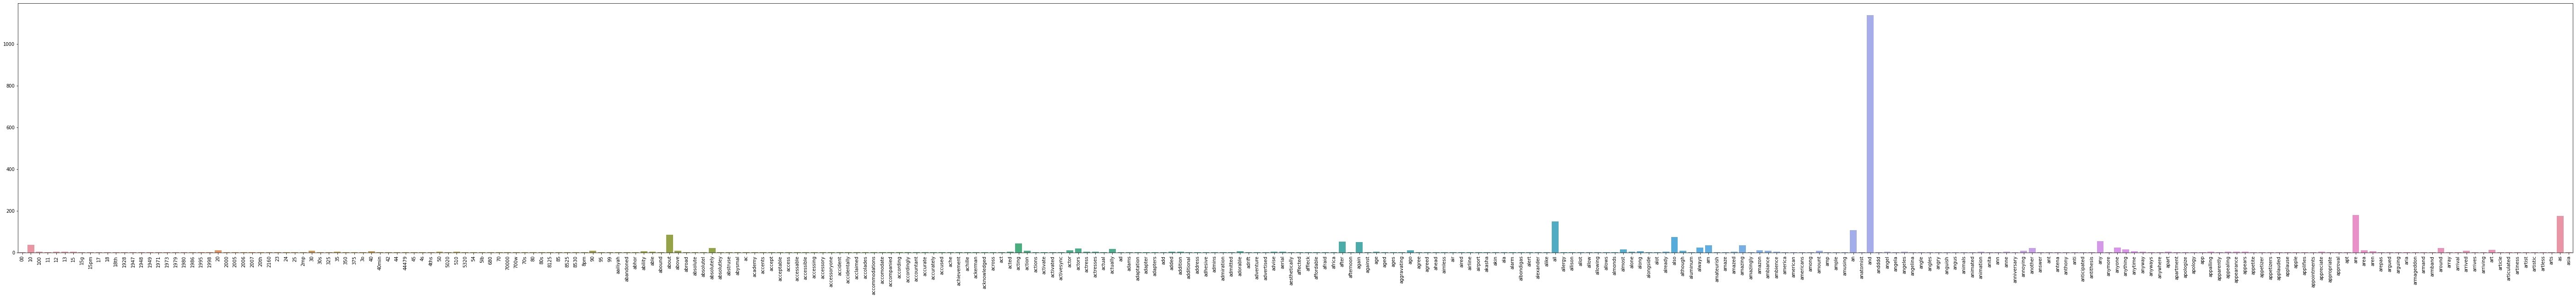

In [56]:
plt.subplots(figsize=(100, 10))
bar = sns.barplot(x=count_vect.get_feature_names()[:300],
                 y=term_frequencies[:300])
bar.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [57]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


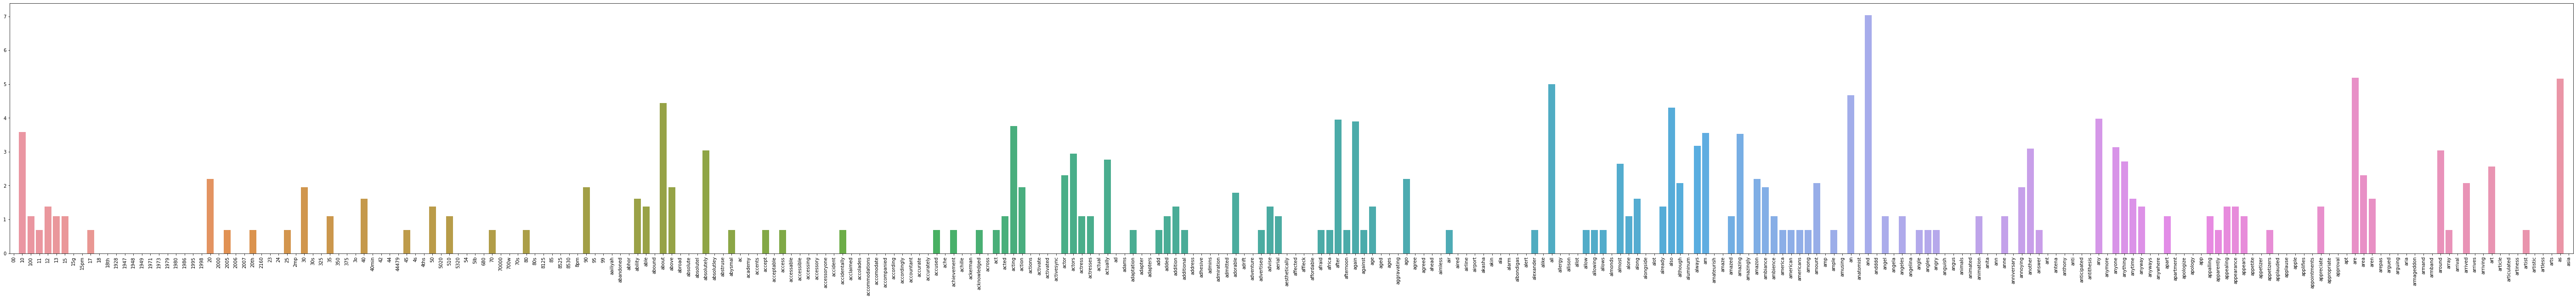

In [58]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [59]:
# -- binarize the dataset by the library -- #
from sklearn import preprocessing , metrics, decomposition, pipeline, dummy

In [60]:
mlb = preprocessing.LabelBinarizer()

In [61]:
mlb.fit(DS.lib)

LabelBinarizer()

In [62]:
mlb.classes_

array([0., 1., 2.])

In [63]:
DS['bin_category'] = mlb.transform(DS['lib']).tolist()

In [64]:
DS[0:9]

,text,score,lib_name,lib,unigrams,bin_category
0,I would not recommend this item to anyone.,0,amazon_cells,0.0,"[I, would, not, recommend, this, item, to, any...","[1, 0, 0]"
1,* Comes with a strong light that you can use t...,1,amazon_cells,0.0,"[*, Comes, with, a, strong, light, that, you, ...","[1, 0, 0]"
2,"It was either too cold, not enough flavor or j...",0,yelp,2.0,"[It, was, either, too, cold, ,, not, enough, f...","[0, 0, 1]"
3,"The food sucked, which we expected but it suck...",0,yelp,2.0,"[The, food, sucked, ,, which, we, expected, bu...","[0, 0, 1]"
4,"John Garfield, Ann revere, Lilli Plmer, Willia...",1,imdb,1.0,"[John, Garfield, ,, Ann, revere, ,, Lilli, Plm...","[0, 1, 0]"
5,But this movie really got to me.,1,imdb,1.0,"[But, this, movie, really, got, to, me, .]","[0, 1, 0]"
6,This particular model would not work with my M...,0,amazon_cells,0.0,"[This, particular, model, would, not, work, wi...","[1, 0, 0]"
7,(very serious spoilers) this movie was a huge ...,0,imdb,1.0,"[(, very, serious, spoilers, ), this, movie, w...","[0, 1, 0]"
8,"I've only had my bluetooth for a few weeks, bu...",1,amazon_cells,0.0,"[I, 've, only, had, my, bluetooth, for, a, few...","[1, 0, 0]"


In [65]:
DS['bin_category'][0]

[1, 0, 0]

In [66]:
type(DS['bin_category'][0])

list

In [67]:
# -- calculation of cosine simularity -- #
doc_to_transform_1 = []
random_record_1 = DS.iloc[50]
random_record_1 = random_record_1['text']
doc_to_transform_1.append(random_record_1)

doc_to_transform_2 = []
random_record_2 = DS.iloc[100]
random_record_2 = random_record_2['text']
doc_to_transform_2.append(random_record_2)

doc_to_transform_3 = []
random_record_3 = DS.iloc[150]
random_record_3 = random_record_3['text']
doc_to_transform_3.append(random_record_3)

In [68]:
print(doc_to_transform_1)
print(doc_to_transform_2)
print(doc_to_transform_3)

["I can't tell you how disappointed I was."]
['The replacement died in a few weeks.']
["Verizon's bills, however, are difficult to understand even though their pricing plans are simple."]


In [69]:
from sklearn.preprocessing import binarize

In [70]:
doc_vect_count_1 = count_vect.transform(doc_to_transform_1)
doc_vect_count_2 = count_vect.transform(doc_to_transform_2)
doc_vect_count_3 = count_vect.transform(doc_to_transform_3)

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(doc_vect_count_1, doc_vect_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(doc_vect_count_1, doc_vect_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(doc_vect_count_1, doc_vect_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(doc_vect_count_2, doc_vect_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### 3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
1. Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Top 50 terms in the dataset after remove the stop words')

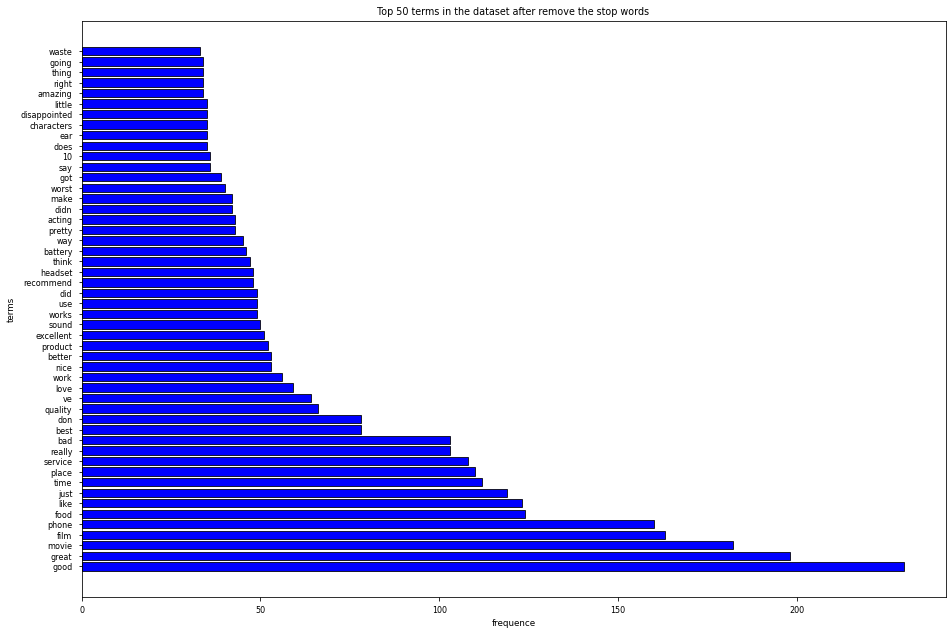

In [72]:
import plotly.express as px

count_vect_nsw = CountVectorizer(stop_words='english')
DS_counts_nsw = count_vect_nsw.fit_transform(DS.text)

# --- calculate the words --- #
total_voc_count_nsw = sum(DS_counts_nsw).toarray()[0]

# --- most 50 frequent words
first_num_voc_nsw = total_voc_count_nsw.argsort()[-50:][::-1]

list_numb_voc_nsw = [count_vect_nsw.get_feature_names()[i] for i in first_num_voc_nsw]

# --- preparte the plot --- #
fig = plt.figure()
plt.style.use('seaborn-paper')
ax = fig.add_axes([0, 0, 2, 2])

# --- plot horizontal bar figure --- #
ax.barh(list_numb_voc_nsw, total_voc_count_nsw[first_num_voc_nsw], linewidth=0.8, ec = 'k', color = 'b')
ax.set_xlabel('frequence')
ax.set_ylabel('terms')
ax.set_title('Top 50 terms in the dataset after remove the stop words')



2. Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
TFIDF = vectorizer.fit_transform(DS.text)

In [74]:
TFIDF.shape

(2968, 5154)

In [75]:
# -- appling naive bayes classification -- #
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [76]:
# -- split data into train data and testing data (TFIDF) -- #
X_train, X_test, Y_train, Y_test = train_test_split(TFIDF, DS.score, test_size=0.25)

3. Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [77]:
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8234501347708895

In [78]:
# -- split data into train data and testing data (term frequency) -- #
X_train, X_test, Y_train, Y_test = train_test_split(DS_counts, DS.score, test_size=0.25)

In [79]:
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8328840970350404

If we analysis from the result, the two different feature extraction method shows quiet the same accuarcy by using the naive basye method.

If we take a look at the TF-IDF feature. It is express by the possibility instead of the counting of the quentity. The advantage of TF-IDF is that it consider the frequency of the words using in how much documents. This means that if the word is more frequntly used in the data base, the effectness of the word will be considered smaller. The strategy of TF-IDF might work when the documents are full of the preposition or other grammer based words. 

However, the most sentence in the dataset today are relatively shorts. Some of them even are not a compelete sentences. So the TF-IDF feaetures are not better in this dataset.

### 4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

__Answer:__ It has been noticed that the dataset are containing emails with several sentences. And each sentence was formed by several words. During the coding process, print data is frequently used to reveal the latest process result. However, the dimension or the length of the data is sometimes way beyond the displaying restriction. One way to solve this problem is to remove the limit of course. Still, the viewing of a bunch of zeros does not raise any kind of valuable connection. A way to reorganize the output sequence is necessary.

### 5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 